### Load The Data

In [1]:
#import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import seaborn as sb
%matplotlib inline

from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,recall_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing train and test dataset
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Shape :',data.shape)
print('Test data shape',test.shape)
data.head()

Shape : (2000, 21)
Test data shape (1000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Exploratory Data Analysis 

In [3]:
# some imp values for all features
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

All the values in dataset are Numerical type 

In [5]:
# counter for target (price range)
Counter(data.price_range)

Counter({1: 500, 2: 500, 3: 500, 0: 500})

In [6]:
# check for null values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
# check for NaN values
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- Zero NaN Values Present in Dataset

In [8]:
# sum of duplicate data
data.duplicated().sum()

0

- Zero Duplicate Values Present in Dataset

In [9]:
# Columns in dataset
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
#rename the columns of data
data.rename(columns={'blue':'bluetooth','fc':'front_camera', 'four_g':'4G',
       'int_memory':'internal_memory', 'm_dep':'mobile_depth', 'mobile_wt':'mobile_weight', 'n_cores':'no_cores_processor', 'pc':'primary_camera', 'px_height':'pixel_height_resolution',
       'px_width':'pixel_width_resolution','sc_h':'screen_height', 'sc_w':'screen_width', 'talk_time':'battery_talk_time', 'three_g':'3G'},inplace=True)
    

In [11]:
# data with renamed columns
data

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,4G,internal_memory,mobile_depth,mobile_weight,no_cores_processor,...,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width,battery_talk_time,3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Data Visualization

In [15]:
# Checking values for target
sb.catplot('price_range',data=data,kind='count',size = 5)

TypeError: catplot() got multiple values for argument 'data'

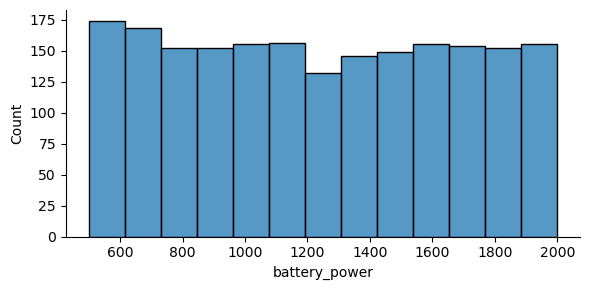

In [16]:
sb.displot(data["battery_power"],aspect=2,height=3)
plt.show()

- This plot shows how the battery mAh is spread. there is a gradual increase as the price range increases

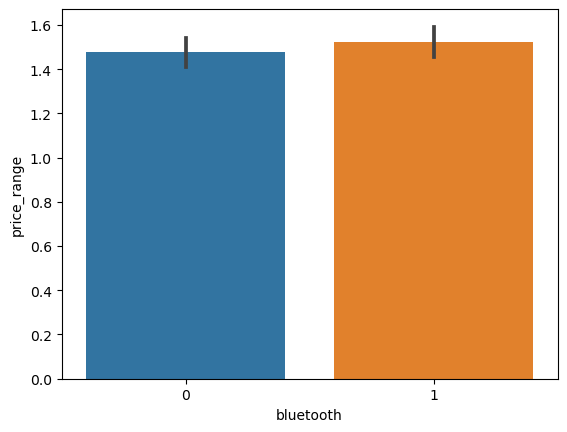

In [17]:
sb.barplot(data=data,x='bluetooth',y='price_range')
plt.show()

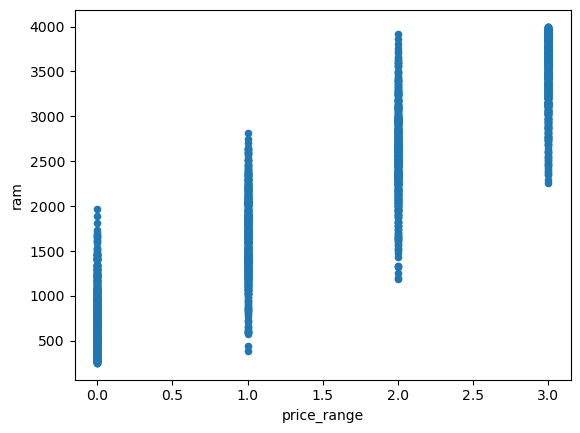

In [18]:
data.plot(x='price_range',y='ram',kind='scatter')
plt.show()

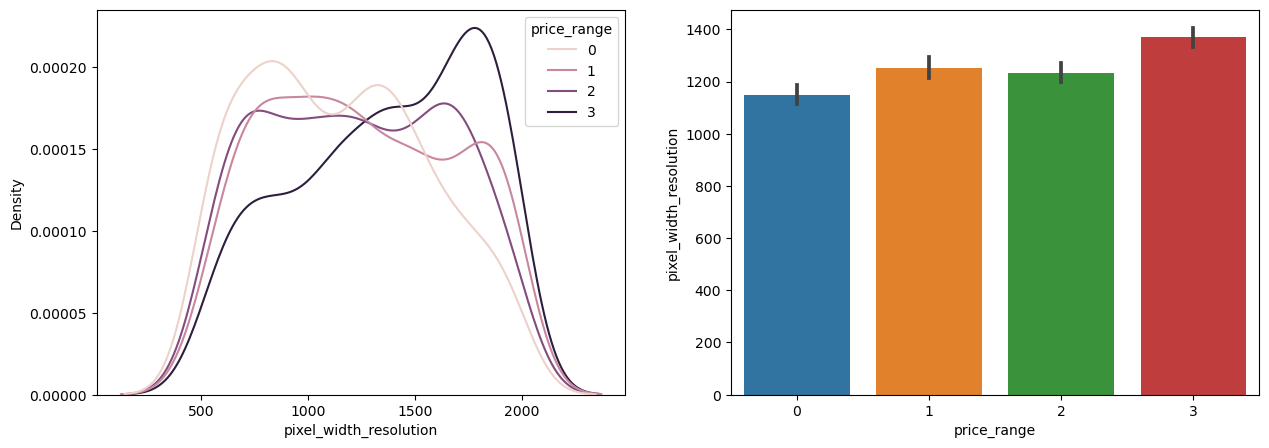

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sb.kdeplot(data=data, x='pixel_width_resolution', hue='price_range', ax=axs[0])
sb.barplot(data=data, x='price_range', y='pixel_width_resolution', ax=axs[1])
plt.show()

- There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

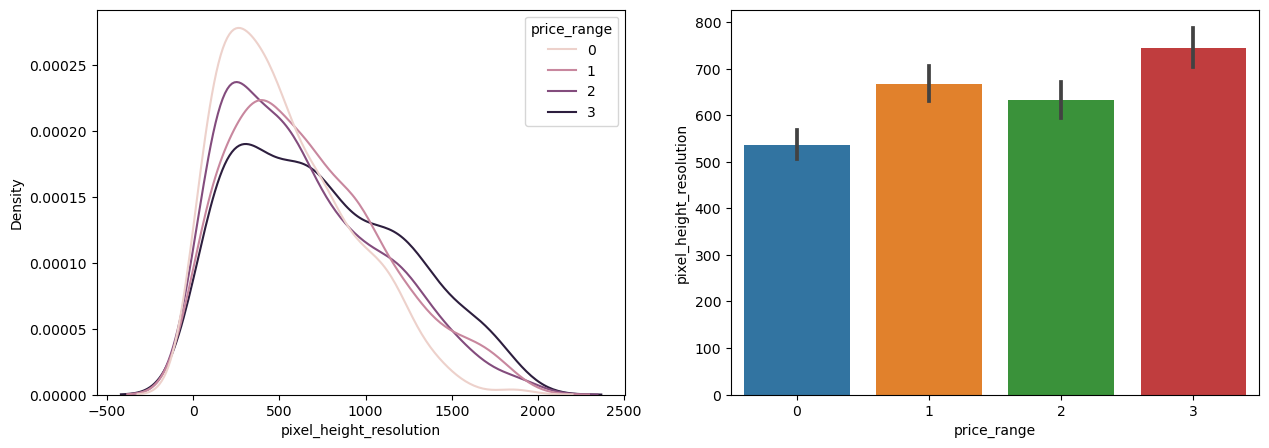

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sb.kdeplot(data=data, x='pixel_height_resolution', hue='price_range', ax=axs[0])
sb.barplot(data=data, x='price_range', y='pixel_height_resolution', ax=axs[1])
plt.show()

<Figure size 1000x1000 with 0 Axes>

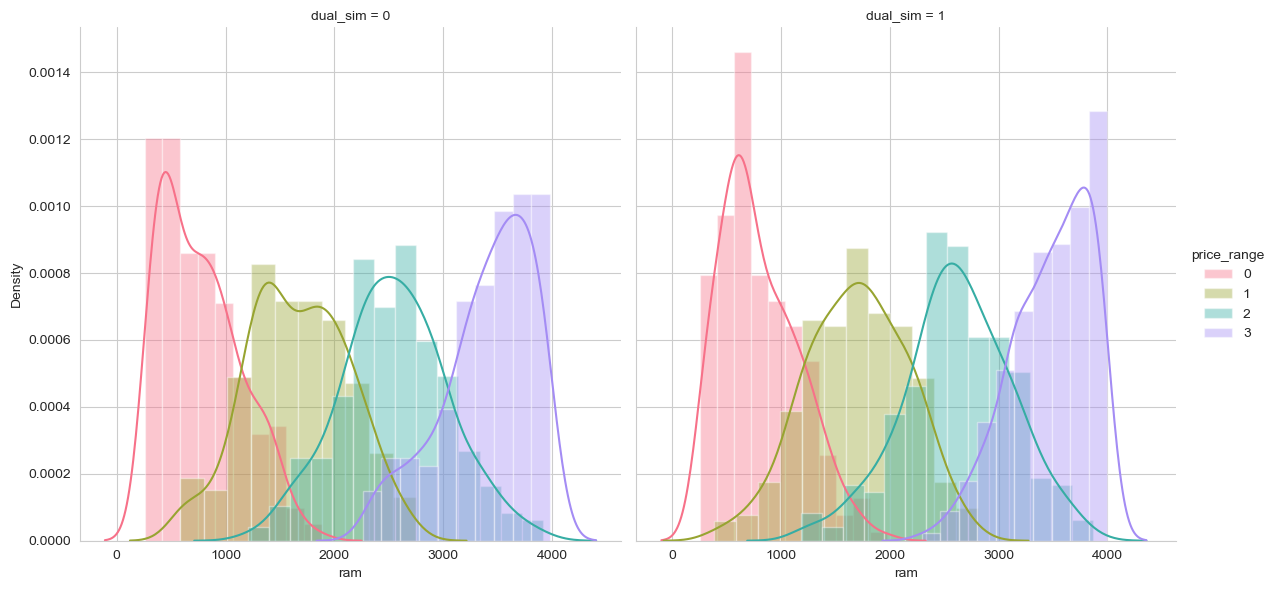

In [27]:
plt.figure(figsize=(10, 10))
g = sb.FacetGrid(data=data, col='dual_sim', hue='price_range', palette='husl', height=6)
g = (g.map(sb.distplot, 'ram').add_legend())
plt.show()

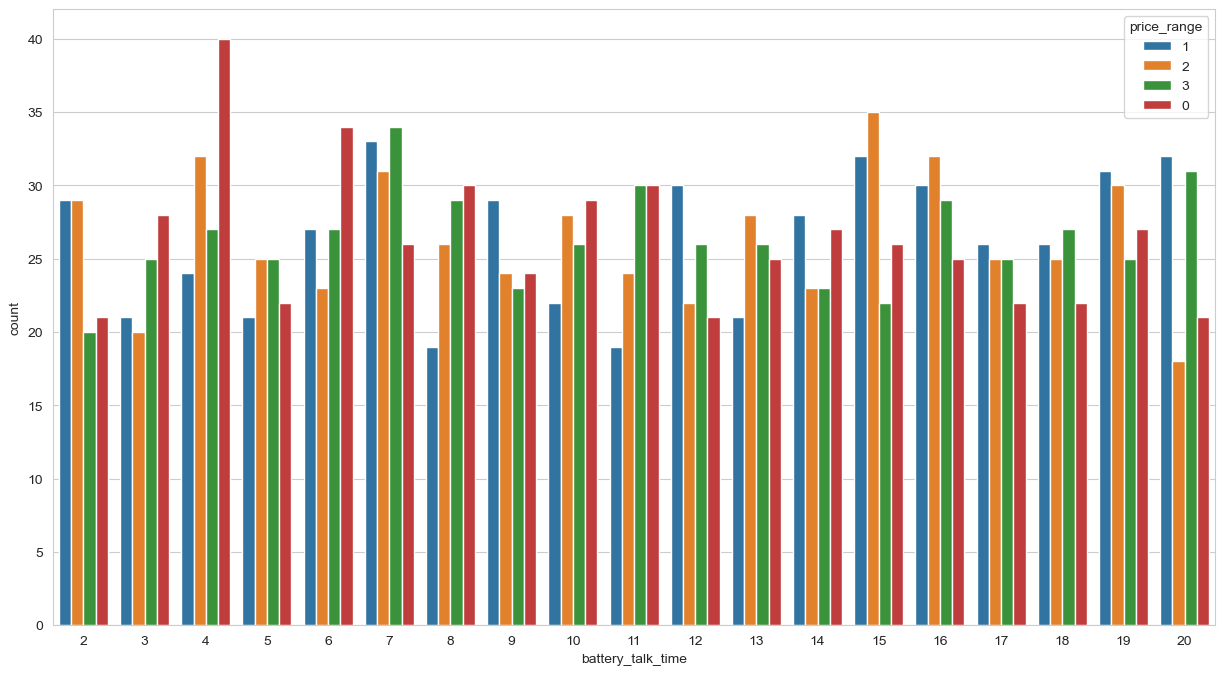

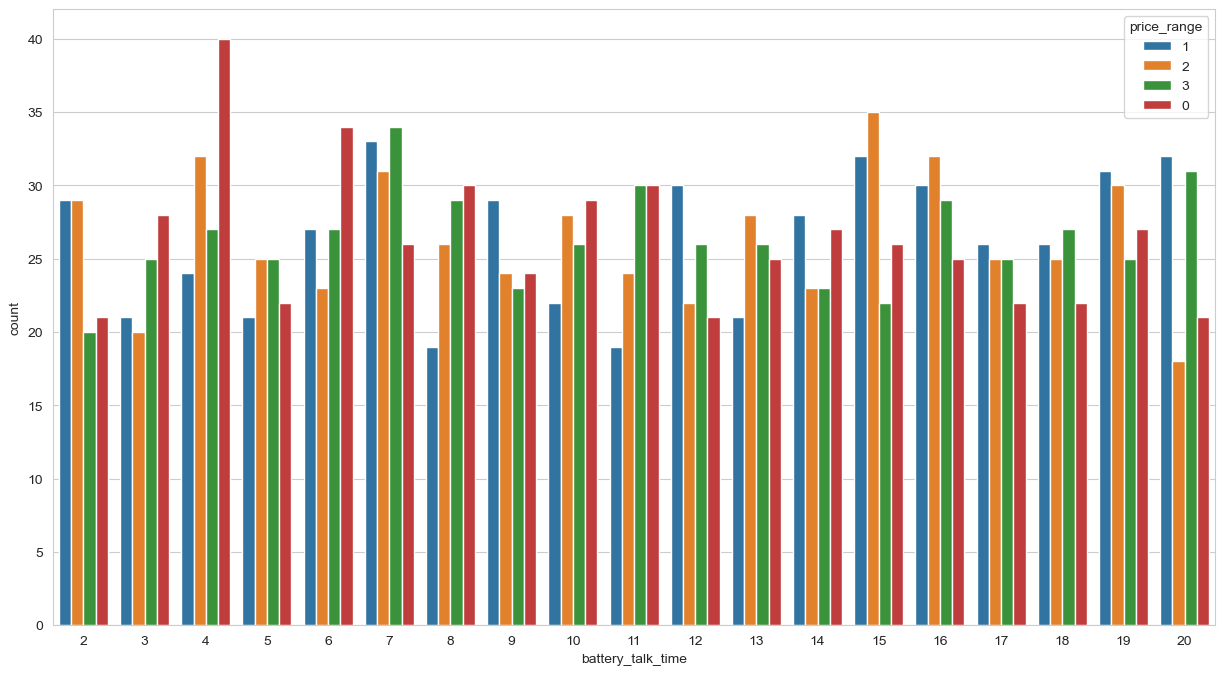

In [29]:
import seaborn as sb
import matplotlib.pyplot as plt

# Convert the 'price_range' column to strings
data['price_range'] = data['price_range'].astype(str)

# Plot the countplot
plt.figure(figsize=(15, 8))
sb.countplot(data=data, x='battery_talk_time', hue='price_range')
plt.show()

plt.figure(figsize=(15, 8))
sb.countplot(data=data, x='battery_talk_time', hue='price_range')
plt.show()

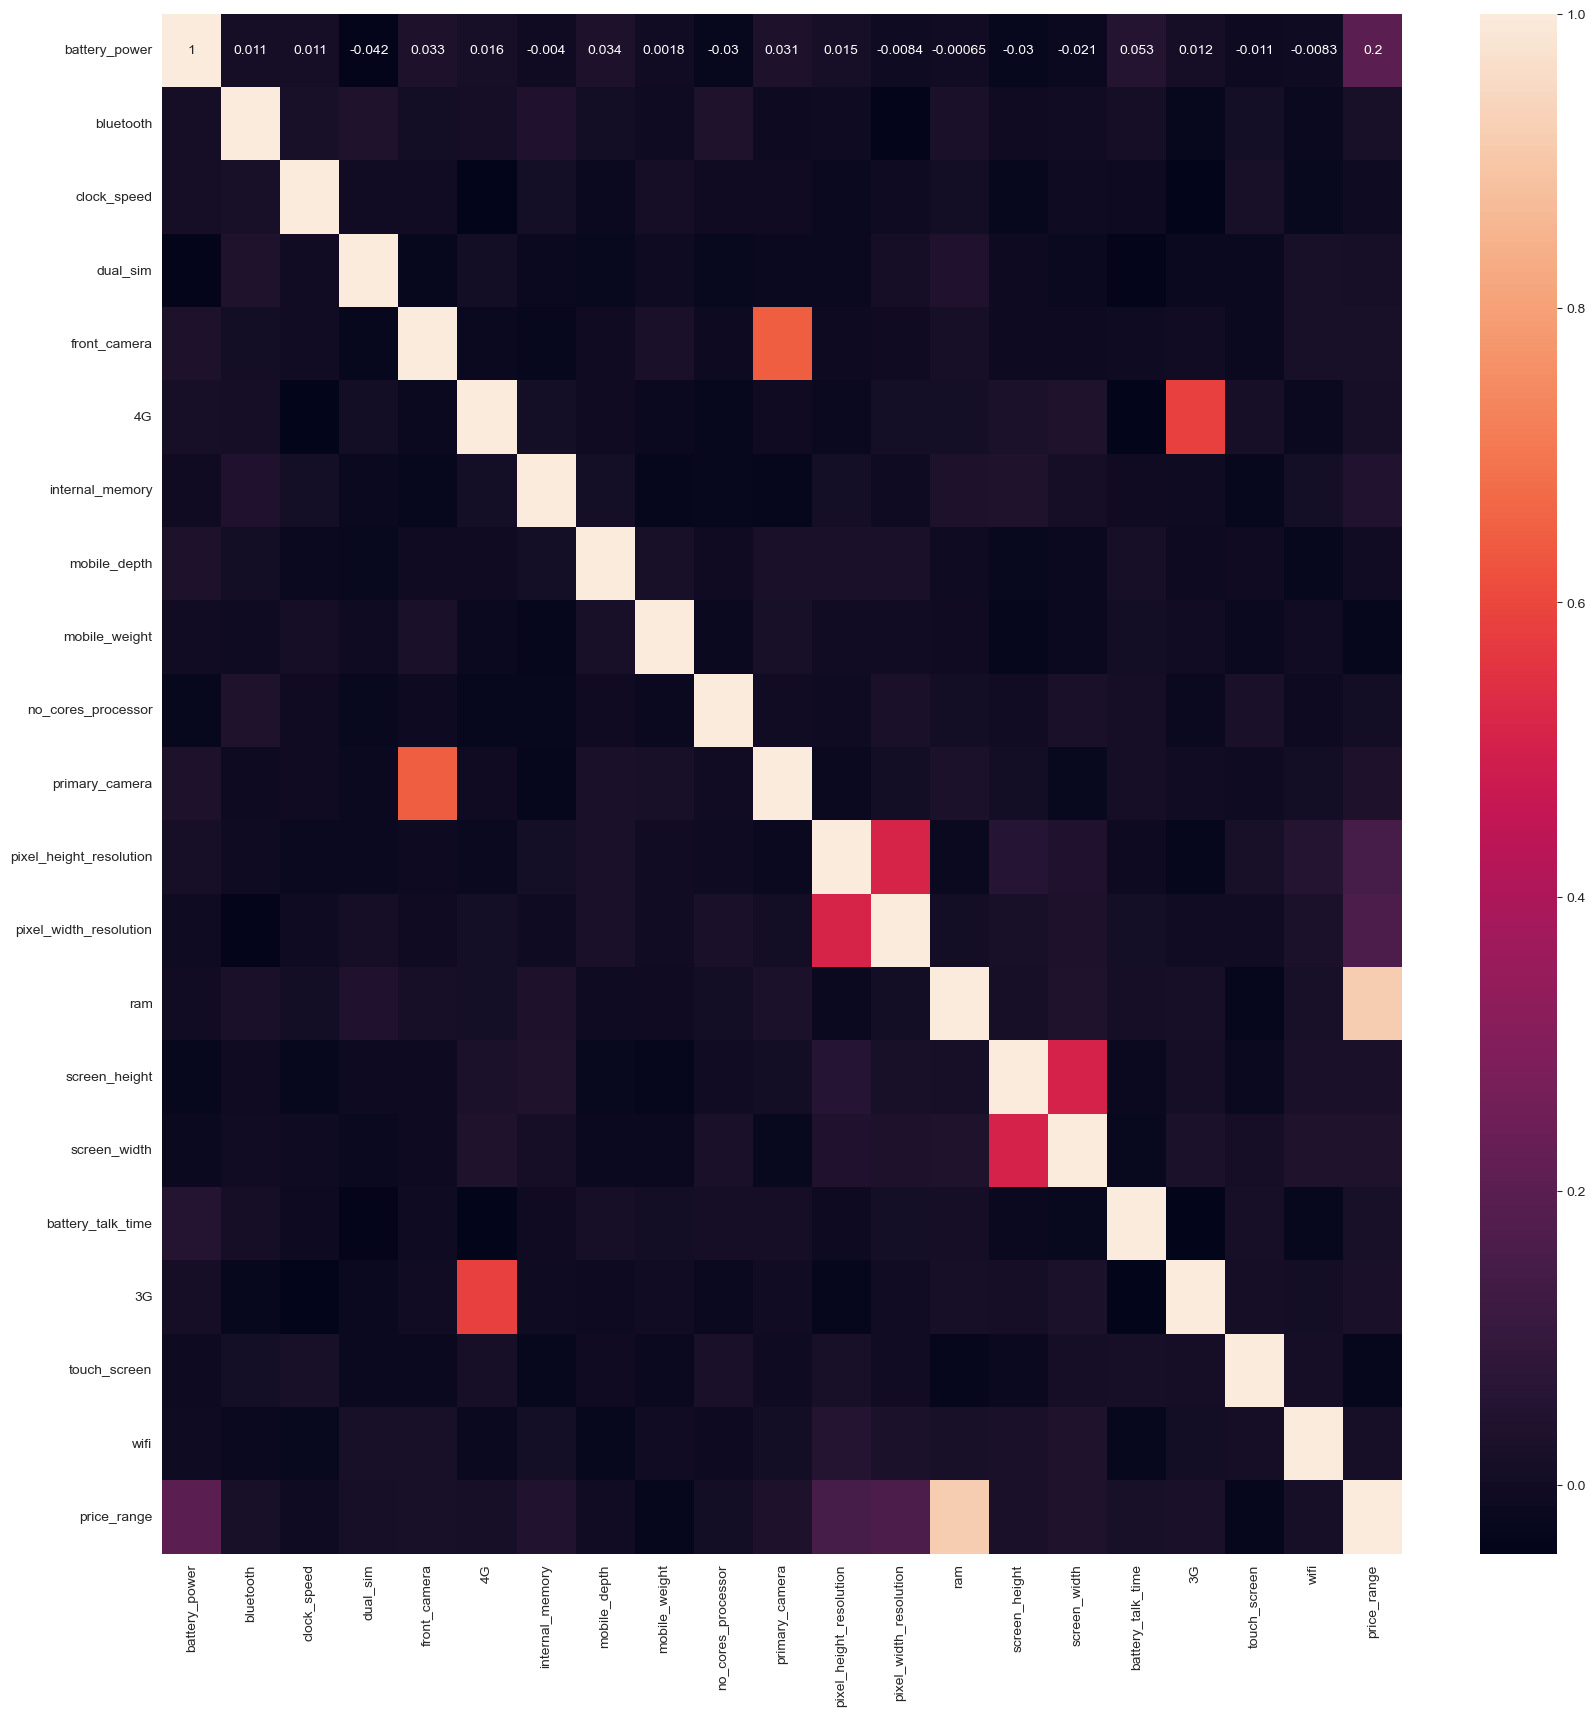

In [30]:
#get correlations of each features in dataset
corr = data.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heat map
g=sb.heatmap(data[top_corr_features].corr(),annot=True)

- bettery_power, pixel_height_resolution, pixel_width_resolution and ram are highly correlated with price_range
- front_cemara,4G,internal_memory,no_cores_processor,primary_cemara also imp features

In [31]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       '4G', 'internal_memory', 'mobile_depth', 'mobile_weight',
       'no_cores_processor', 'primary_camera', 'pixel_height_resolution',
       'pixel_width_resolution', 'ram', 'screen_height', 'screen_width',
       'battery_talk_time', '3G', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

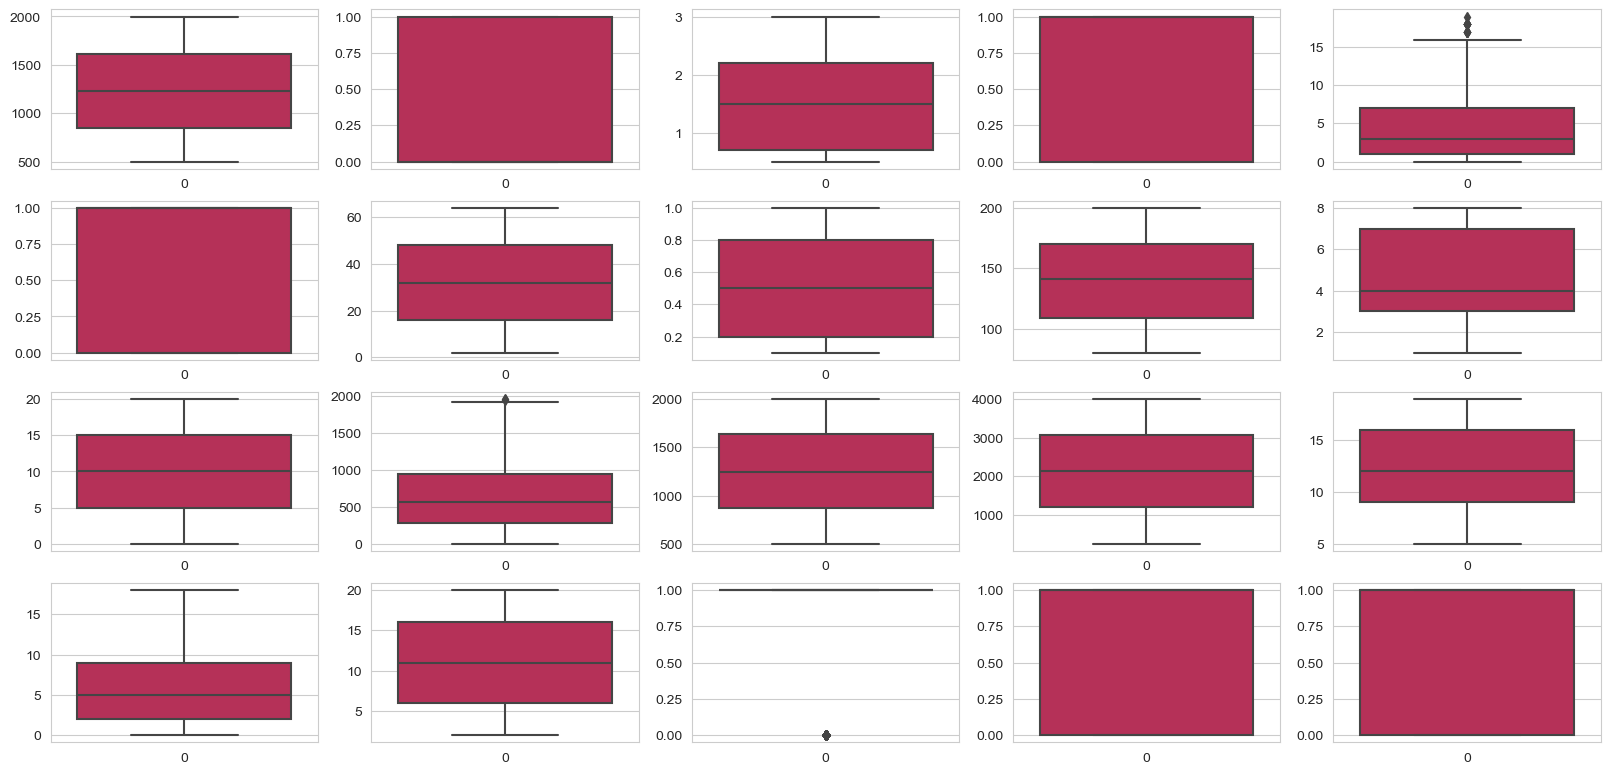

In [32]:
cols = ['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       '4G', 'internal_memory', 'mobile_depth', 'mobile_weight',
       'no_cores_processor', 'primary_camera', 'pixel_height_resolution',
       'pixel_width_resolution', 'ram', 'screen_height', 'screen_width',
       'battery_talk_time', '3G', 'touch_screen', 'wifi', 'price_range']

plt.figure(figsize=(20,12))   
for index,item in enumerate([i for i in data.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sb.boxplot(data[item],whis=1.5, palette='rocket')
print("\n")

In [67]:
#def remove_outlier(col):
 #   sorted(col)
 #   Q1,Q3=np.percentile(col,[25,75])
 #   IQR=Q3-Q1
 #   lower_range= Q1-(1.5 * IQR)
 #   upper_range= Q3+(1.5 * IQR)
 #   return lower_range, upper_range

#for column in data[cols].columns:
#    lr,ur=remove_outlier(data[column])
#    data[column]=np.where(data[column]>ur,ur,data[column])
#    data[column]=np.where(data[column]<lr,lr,data[column])

def remove_outlier(col):
    col = col.dropna()  # Drop NaN values
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

numeric_columns = data.select_dtypes(include=['int', 'float']).columns

for column in numeric_columns:
    lr, ur = remove_outlier(data[column])
    data[column] = np.where(data[column] > ur, ur, data[column])
    data[column] = np.where(data[column] < lr, lr, data[column])

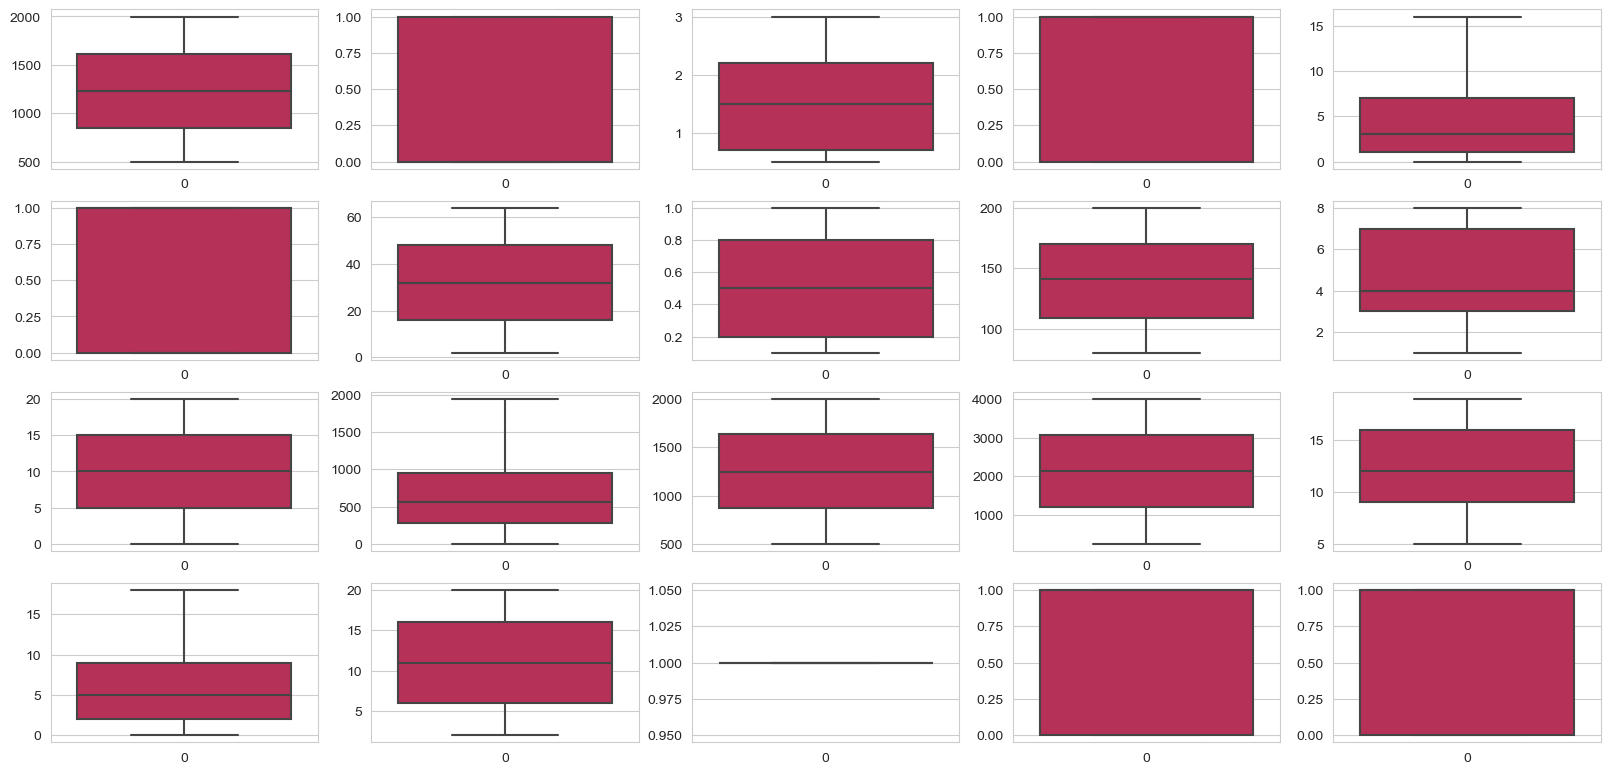

In [34]:
plt.figure(figsize=(20,12))   
for index,item in enumerate([i for i in data.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sb.boxplot(data[item],whis=1.5, palette='rocket')
print("\n")

### Feature importance 

[0.06364999 0.02058425 0.03415431 0.02030871 0.03361956 0.01834651
 0.03488102 0.03394928 0.03797029 0.03398211 0.03492245 0.04723888
 0.04969567 0.39315466 0.03443662 0.03529582 0.03555823 0.
 0.01803313 0.02021851]


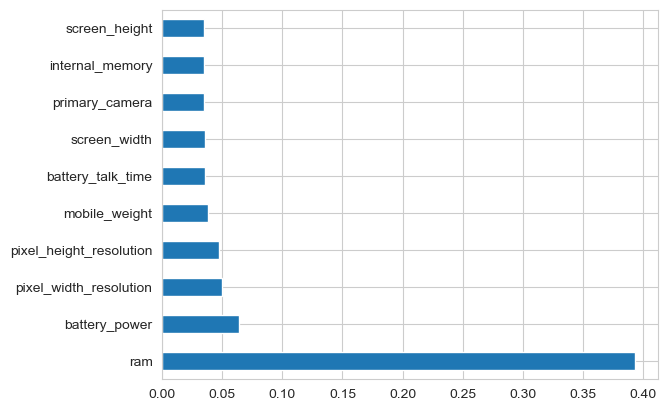

In [35]:
x = data.iloc[:,:-1]  #independent columns
y = data.loc[:,["price_range"]]    #target column 

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       '4G', 'internal_memory', 'mobile_depth', 'mobile_weight',
       'no_cores_processor', 'primary_camera', 'pixel_height_resolution',
       'pixel_width_resolution', 'ram', 'screen_height', 'screen_width',
       'battery_talk_time', '3G', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [37]:
# remove less correlated features
data.drop(['bluetooth','clock_speed','dual_sim','mobile_depth','battery_talk_time','3G','touch_screen', 'wifi'],
              axis = 1, inplace= True) 

In [38]:
data.head(5)

,battery_power,front_camera,4G,internal_memory,mobile_weight,no_cores_processor,primary_camera,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width,price_range
0,842.0,1.0,0.0,7.0,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,1
1,1021.0,0.0,1.0,53.0,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,2
2,563.0,2.0,1.0,41.0,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,2
3,615.0,0.0,0.0,10.0,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,2
4,1821.0,13.0,1.0,44.0,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,1


### Feature Scaling

##### Check Distribution : Noramlization

<Axes: ylabel='Density'>

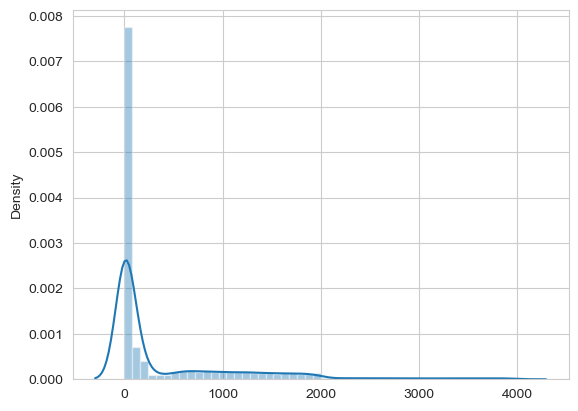

In [39]:
# seaborn displot foe data
sb.distplot(data)

In [66]:
## Skewness for dataset
#from scipy import stats

## Exclude non-numeric columns
#numeric_data = data.select_dtypes(include=['int', 'float'])

## Calculate skewness for numeric data
#skewness = stats.skew(numeric_data)

## Print the skewness values
#print(skewness)

#skew = stats.skew(data)
#skew
from scipy.stats import skew

# Select only numeric columns from your dataset
numeric_data = data.select_dtypes(include=['int', 'float'])

# Calculate skewness for numeric data
skewness = skew(numeric_data)

# Print the skewness values
print(skewness)

[ 0.03187454  0.96850463 -0.08607962  0.0578459   0.00655324  0.00362479
  0.01729317  0.66536663  0.01477638  0.00662306 -0.09881006  0.63331163]


In [65]:
## Kurtosis  for dataset
#kurto = stats.kurtosis(data)
#kurto

from scipy.stats import kurtosis

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['int', 'float'])

# Calculate kurtosis for numeric data
kurto = kurtosis(numeric_data)

# Print the kurtosis values
print(kurto)

[-1.22408417  0.05703955 -1.9925903  -1.21603447 -1.21035115 -1.22967604
 -1.1715706  -0.31967765 -1.18604079 -1.19193387 -1.19081485 -0.39154816]


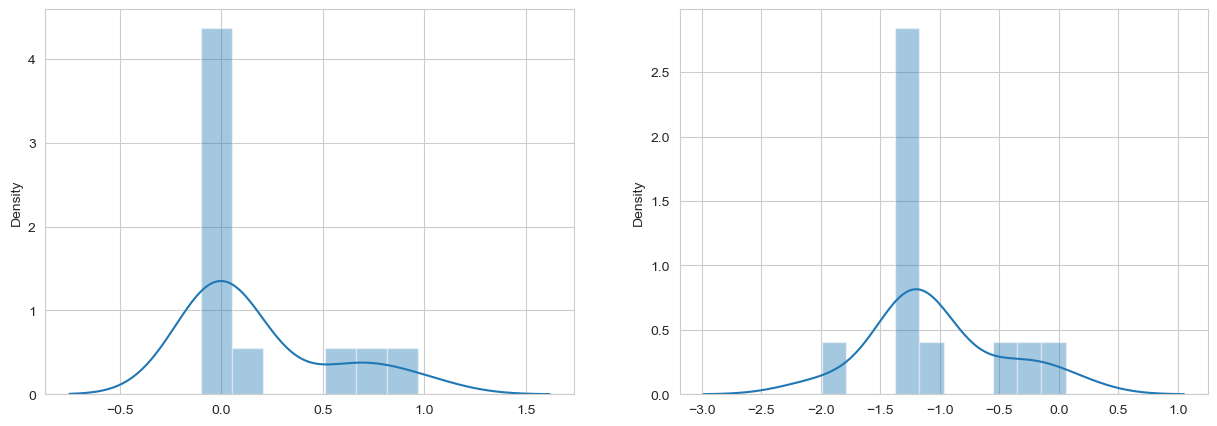

In [62]:
from scipy.stats import kurtosis

# Calculate kurtosis for numeric data
kurtosis_values = kurtosis(numeric_data)

# Plot the skewness and kurtosis
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Seaborn plot for skewness
sb.distplot(skewness, ax=axs[0])

# Seaborn plot for kurtosis
sb.distplot(kurtosis_values, ax=axs[1])

plt.show()


#fig, axs = plt.subplots(1,2, figsize=(15,5))
## seaborn plot for skewness for clean data 
#sb.distplot(skew,ax=axs[0])
## seaborn plot for kurtosis for clean data
#sb.distplot(kurto, ax=axs[1])
#plt.show()

- After Visualize above Plots, The Dataset Is Evenly Distributed

In [46]:
X=data.iloc[:,:-1]
X.head()

,battery_power,front_camera,4G,internal_memory,mobile_weight,no_cores_processor,primary_camera,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width
0,842.0,1.0,0.0,7.0,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0
1,1021.0,0.0,1.0,53.0,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0
2,563.0,2.0,1.0,41.0,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0
3,615.0,0.0,0.0,10.0,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0
4,1821.0,13.0,1.0,44.0,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0


In [47]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


### Splitting the data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (1400, 12)
X_test shape (600, 12)
y_train shape (1400, 1)
y_test shape (600, 1)


### Creating & Training Model

### Decision Tree

In [50]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
pred = model_dt.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test,pred))
print('Recall: %.3f' % recall_score(y_test,pred, average='micro'))
print('Classification Report\n',classification_report(y_test,pred))

Accuracy: 0.822
Recall: 0.822
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       151
           1       0.75      0.84      0.80       146
           2       0.75      0.73      0.74       148
           3       0.86      0.85      0.85       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.83      0.82      0.82       600



### Gradient Boosting


In [51]:
from sklearn.ensemble import GradientBoostingClassifier
model_gra = GradientBoostingClassifier()
model_gra.fit(X_train,y_train)
pred1 = model_gra.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test,pred1))
print('Recall: %.3f' % recall_score(y_test,pred1, average='micro'))
print('Classification Report\n',classification_report(y_test,pred1))

Accuracy: 0.898
Recall: 0.898
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       151
           1       0.86      0.90      0.88       146
           2       0.84      0.84      0.84       148
           3       0.93      0.91      0.92       155

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



### KNN

In [52]:
#creating model
model_knn = KNeighborsClassifier()
#fitting model
model_knn.fit(X_train,y_train)
pred2 = model_knn.predict(X_test)
y_predict = model_knn.predict(X_train)
print('Train accuracy: %.3f' % accuracy_score(y_train,y_predict))
print('-'*21)
print('Test Accuracy: %.3f' % accuracy_score(y_test,pred2))
print('Recall: %.3f' % recall_score(y_test,pred2, average='micro'))
print('Classification Report\n',classification_report(y_test,pred2))

Train accuracy: 0.957
---------------------
Test Accuracy: 0.918
Recall: 0.918
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       151
           1       0.88      0.92      0.90       146
           2       0.89      0.86      0.87       148
           3       0.94      0.93      0.94       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



### Passing Test data set

In [53]:
test.rename(columns={'blue':'bluetooth','fc':'front_camera', 'four_g':'4G',
       'int_memory':'internal_memory', 'm_dep':'mobile_depth', 'mobile_wt':'mobile_weight', 'n_cores':'no_cores_processor', 'pc':'primary_camera', 'px_height':'pixel_height_resolution',
       'px_width':'pixel_width_resolution','sc_h':'screen_height', 'sc_w':'screen_width', 'talk_time':'battery_talk_time', 'three_g':'3G'},inplace=True)
       
# remove less correlated features
test.drop(['id','bluetooth','clock_speed','dual_sim','mobile_depth','battery_talk_time','3G','touch_screen', 'wifi'],
              axis = 1, inplace= True)
print(test.shape)
test.head()

(1000, 12)


,battery_power,front_camera,4G,internal_memory,mobile_weight,no_cores_processor,primary_camera,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width
0,1043,14,0,5,193,3,16,226,1412,3476,12,7
1,841,4,1,61,191,5,12,746,857,3895,6,0
2,1807,1,0,27,186,3,4,1270,1366,2396,17,10
3,1546,18,1,25,96,8,20,295,1752,3893,10,0
4,1434,11,1,49,108,6,18,749,810,1773,15,8


In [54]:
test['predicted_price_range'] = model_knn.predict(test)
test.head()

,battery_power,front_camera,4G,internal_memory,mobile_weight,no_cores_processor,primary_camera,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width,predicted_price_range
0,1043,14,0,5,193,3,16,226,1412,3476,12,7,3
1,841,4,1,61,191,5,12,746,857,3895,6,0,3
2,1807,1,0,27,186,3,4,1270,1366,2396,17,10,3
3,1546,18,1,25,96,8,20,295,1752,3893,10,0,3
4,1434,11,1,49,108,6,18,749,810,1773,15,8,1


### Roc Auc Score & Curve

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize

In [56]:
probs = model_knn.predict_proba(X_test)
y_score = probs

fpr = {}
tpr = {}
threshold = {}
roc_auc_score = {}

for i in range(0,4):
    fpr[i], tpr[i],threshold[i] = roc_curve(y_test,y_score[:,i], pos_label=i)
    roc_auc_score = auc(fpr[i],tpr[i])
    
print(roc_auc_score)

nan


In [57]:
#fpr

In [58]:
#tpr

In [59]:
#threshold

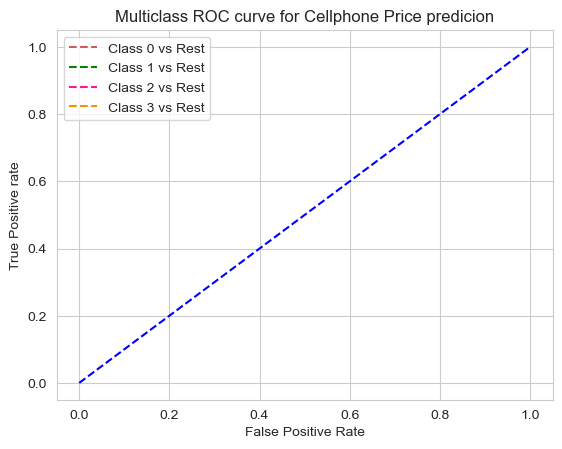

In [60]:
# plot of ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='indianred', label='Class 0 vs Rest') 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest') 
plt.plot(fpr[2], tpr[2], linestyle='--',color='deeppink', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='darkorange', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Multiclass ROC curve for Cellphone Price predicion') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.legend(loc='best') 
plt.savefig('Multiclass ROC',dpi=500);     
